# Lab - Interpolação Linear

Esta tarefa explora a interpolação a partir do sinal decimado, numericamente e fazendo inserção de zeros seguida de convolução. Compara a resposta em frequência deste processo com a resposta em frequencia teórica.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *

Considere a sequencia

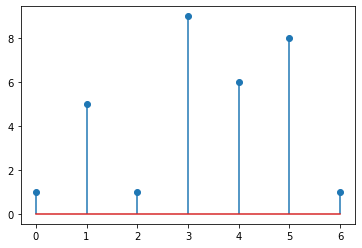

In [2]:
x=[1, 5, 1, 9, 6, 8, 1]
stem(x)
show()

a) Obtenha a sequencia xi, como sendo a interpolação linear com 3 novas amostras entre cada amostra de x, usando a função interp(). 
Plote a sequencia obtida com stem e a sequancia x com simbolo vermelho.

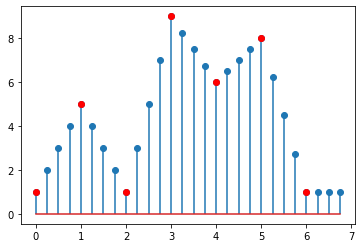

In [3]:
xt = 0.25*arange(28)
xi = interp(0.25*arange(28),arange(7),x)
stem(xt, xi)
plot(x, 'ro')
show()

b) Obtenha a sequencia xe como a expansão da sequencia x por um fator L=4, ou seja, inserindo 3 zeros entre cada amostra de x. Plote a sequencia obtida com stem e a sequancia x com simbolo vermelho.

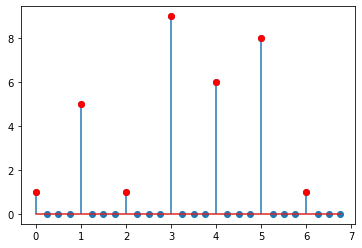

In [4]:
xe = zeros(4*len(x))
xe[::4] = x
stem(xt, xe)
plot(x, 'ro')

c) Considere uma sequencia resposta ao impulso hlin de um sistema que realize a interpolação linear.

<StemContainer object of 3 artists>

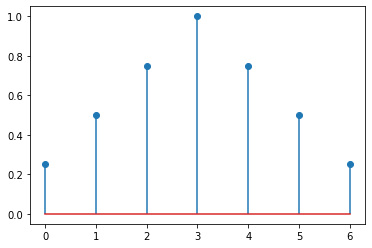

In [5]:
hlin = array([0.25, 0.5, 0.75, 1, 0.75, 0.5, 0.25])
stem(hlin)

d) Obtenha a sequecia xei como a interpolação da sequencia xe pela convolução com hlin. Plote xei com stem e x com simbolo vermelho.

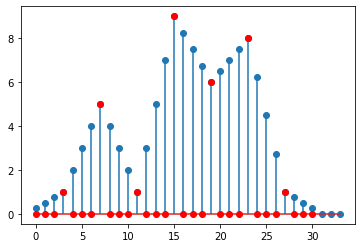

In [15]:
xei = convolve(xe, hlin, 'full')
stem(xei)
xp = zeros(28)
xp[::4] = x
plot(append(zeros(3),xp), 'ro')

e) Obtenha Hlin, 200 valores para $w$ entre 0 e $2\pi$ da função de transferencia teórica do filtro que corresponde à interpolação linear:<br>
$\large H_{lin}(e^{j w})=\frac{1}{L}(\frac{\sin(w L / 2)}{\sin(w / 2))})^2$ <br>
Plote o valor absoluto de $H_{lin}$ juntamente com 20 valores da transformada de Fourier de hlin (HLIN, com símbolo vermelho).<br>
Ignore a mensagem de alerta "invalid value" devido a divisão 0 / 0, ou então use seterr(invalid='ignore').


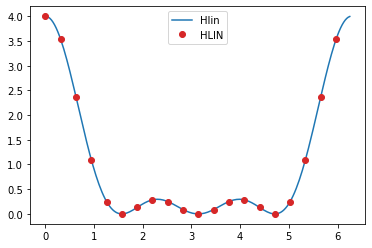

In [23]:
seterr(invalid='ignore')

wlin = linspace(0, 2*pi, 200, endpoint=False)
L = 4

Hlin = (1/L)*((sin(wlin*L/2)/(sin(wlin/2)))**2)

HLIN = fft(hlin, 20)
wHLIN = linspace(0, 2*pi, len(HLIN), endpoint=False)

plot(wlin, abs(Hlin), label='Hlin')
stem(wHLIN, abs(HLIN), linefmt='None', markerfmt='C3o', basefmt='None', label='HLIN')
legend()

f) Qual o valor teórico de Hlin para w=0, que não pode ser calculado numericamente (divisão 0 / 0) ?

In [ ]:
4